In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Classification

## Adult dataset

Predicting whether the salary is above or below 50k per year

In [2]:
df = pd.read_csv('Adult.csv', index_col=0)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Salary                2
dtype: int64

In [7]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [8]:
df.groupby('education').mean()['education-num']

education
 10th             6.0
 11th             7.0
 12th             8.0
 1st-4th          2.0
 5th-6th          3.0
 7th-8th          4.0
 9th              5.0
 Assoc-acdm      12.0
 Assoc-voc       11.0
 Bachelors       13.0
 Doctorate       16.0
 HS-grad          9.0
 Masters         14.0
 Preschool        1.0
 Prof-school     15.0
 Some-college    10.0
Name: education-num, dtype: float64

 We can see that ** education-num ** column represents the the education level in terms of numbers (from 1 to 13, where 1 is the lowest level, 13 is the highest), so later we can drop the ** education ** column and continue with  ** education-num **

In [9]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [12]:
df['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [13]:
df[(df['occupation'] == ' ?') & (df['workclass'] == ' ?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [14]:
df[df['native-country'] == ' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
245,56,Private,203580,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,?,<=50K
249,45,Private,153141,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,?,<=50K
297,39,?,157443,Masters,14,Married-civ-spouse,?,Wife,Asian-Pac-Islander,Female,3464,0,40,?,<=50K
393,34,State-gov,98101,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,?,>50K
453,42,Private,197583,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,?,>50K


In [15]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [16]:
df[df['native-country'] == ' United-States' ]['Salary'].value_counts()

 <=50K    21999
 >50K      7171
Name: Salary, dtype: int64

In [17]:
df[df['native-country'] != ' United-States' ]['Salary'].value_counts()

 <=50K    2721
 >50K      670
Name: Salary, dtype: int64

In [18]:
df[df['native-country'] == ' ?' ]['Salary'].value_counts()

 <=50K    437
 >50K     146
Name: Salary, dtype: int64

## Data Visualization and Analysis 

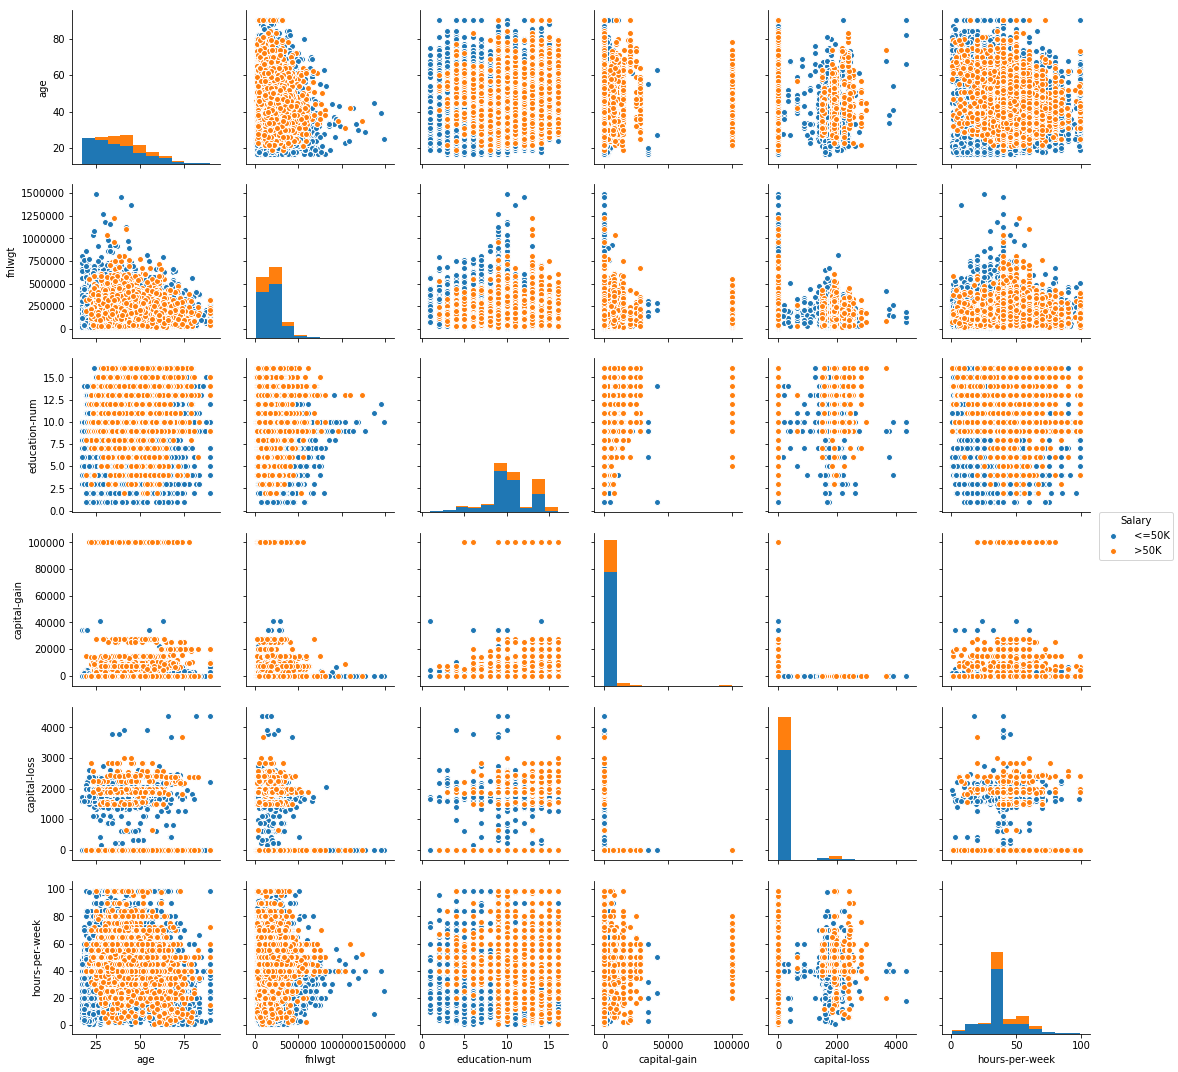

In [19]:
sns.pairplot(df, hue='Salary')

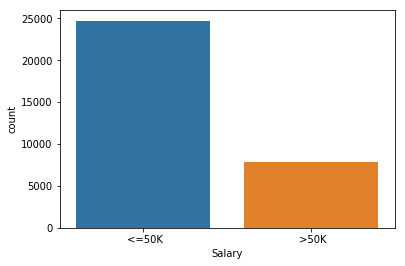

In [20]:
sns.countplot(df['Salary'])

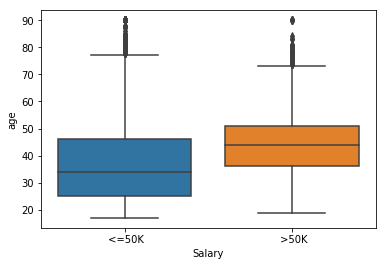

In [21]:
sns.boxplot('Salary', 'age', data = df)

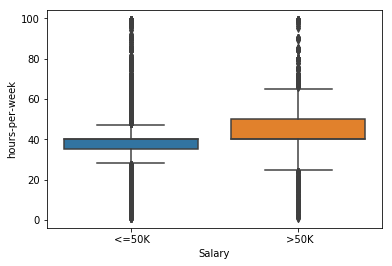

In [22]:
sns.boxplot('Salary', 'hours-per-week', data = df)

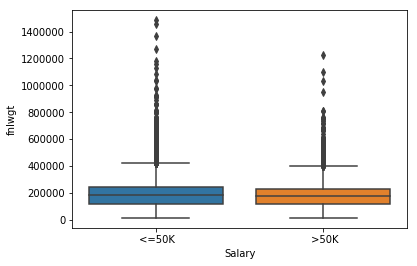

In [23]:
sns.boxplot('Salary', 'fnlwgt', data = df)

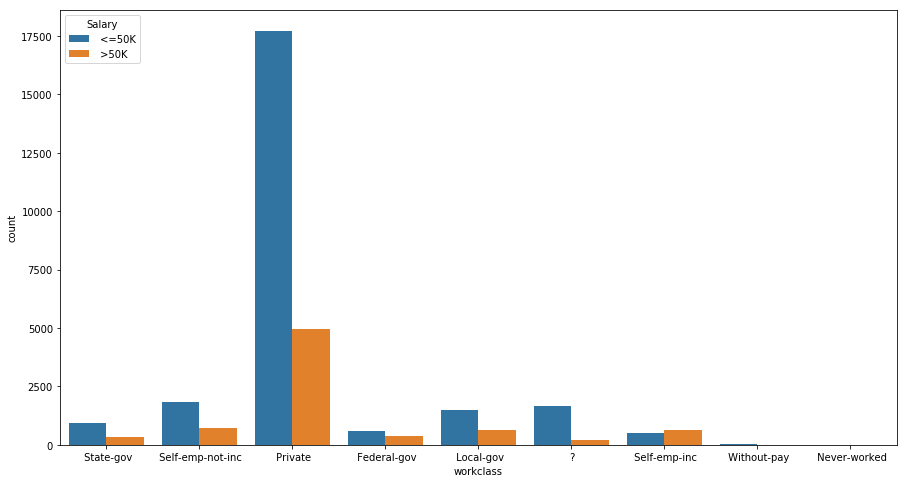

In [24]:
plt.figure(figsize=(15, 8))
sns.countplot(x = 'workclass', hue='Salary', data = df)

In [25]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

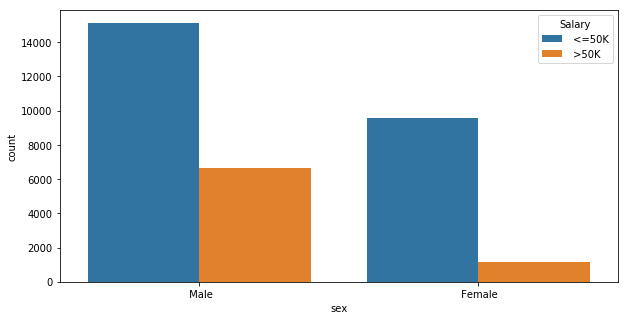

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'sex', hue='Salary', data = df)

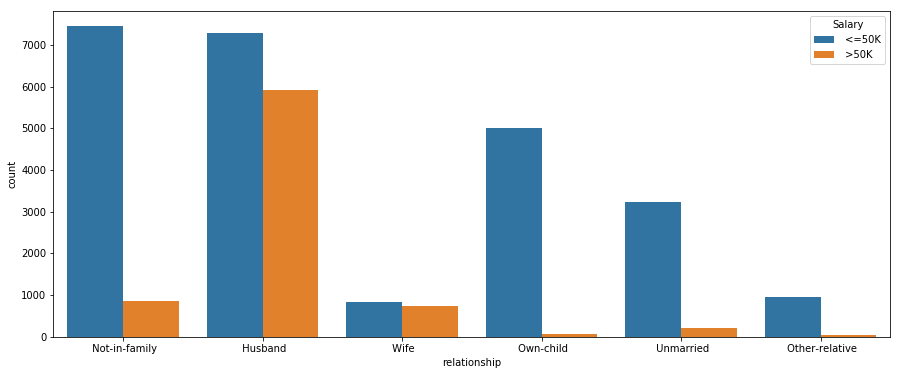

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'relationship', hue='Salary', data = df)

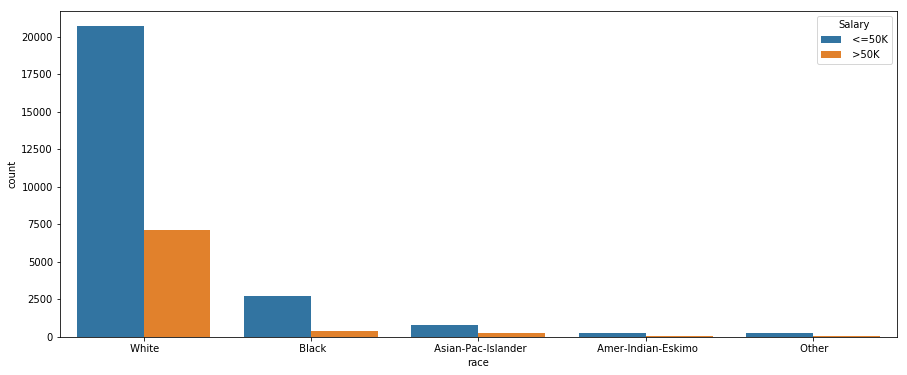

In [28]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'race', hue='Salary', data = df)

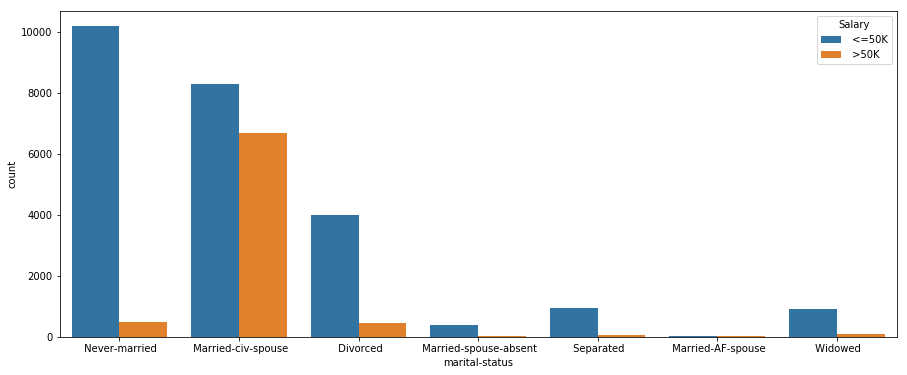

In [29]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'marital-status', hue='Salary', data = df)

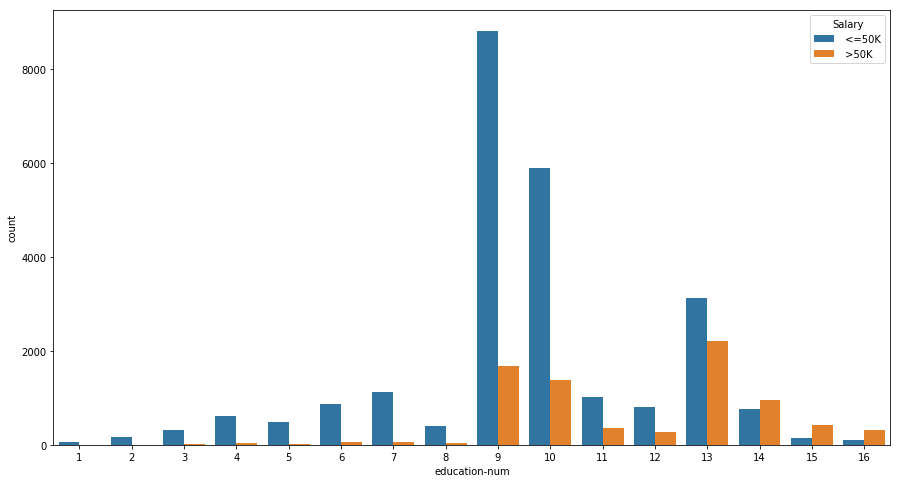

In [30]:
plt.figure(figsize=(15, 8))
sns.countplot(x = 'education-num', hue='Salary', data = df)

## Logistic Regression, KNN and Random Forrest 

Try these 3 models and compare the scores

In [31]:
df['Salary'] = df['Salary'].map({' <=50K': 0, ' >50K': 1 })

In [32]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [33]:
df['occupation'] = df['occupation'].replace(' ?',np.nan)

In [34]:
df.dropna(how='any',inplace=True)

In [35]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64

In [36]:
df['native-country'] = df['native-country'].replace(' ?',np.nan)

In [37]:
df.dropna(how='any',inplace=True)

In [38]:
df.drop(['education', 'fnlwgt'], axis = 1, inplace = True)

In [39]:
def usa(row):
    if row != ' United-States':
        return 'other'
    return row

In [40]:
df['native-country'] = df['native-country'].apply(usa)

In [41]:
df['native-country'].value_counts()

 United-States    27504
other              2658
Name: native-country, dtype: int64

In [42]:
df['marital-status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [43]:
def married(row):
    if row != ' Married-civ-spouse' and row != ' Married-AF-spouse':
        return 'Not married'
    else:
        return 'Married'
    return row

In [44]:
df['marital-status'] = df['marital-status'].apply(married)

In [45]:
df['marital-status'].value_counts()

Not married    16076
Married        14086
Name: marital-status, dtype: int64

In [46]:
ddf = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country' ], drop_first=True)

In [47]:
X = ddf.drop('Salary', axis = 1)
y = ddf['Salary']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lm = LogisticRegression()

In [56]:
lm.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
train_predictions = lm.predict(X_train_scaled)
test_predictions = lm.predict(X_test_scaled)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print("Train Metrics:")
print(classification_report(y_train, train_predictions))

Train Metrics:
             precision    recall  f1-score   support

          0       0.88      0.93      0.90     18151
          1       0.73      0.61      0.66      5978

avg / total       0.84      0.85      0.84     24129



In [60]:
print("Test Metrics:")
print(classification_report(y_test, test_predictions))

Test Metrics:
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      4503
          1       0.75      0.61      0.68      1530

avg / total       0.84      0.85      0.85      6033



In [61]:
from sklearn.metrics import f1_score

In [100]:
f1_log = f1_score(y_test, test_predictions)
f1_log

0.6755300035932447

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
acc_log = accuracy_score(y_test, test_predictions)
acc_log

0.8503232222774739

### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier()

In [67]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
knn_test_pred = knn.predict(X_test_scaled)
knn_train_pred = knn.predict(X_train_scaled)

In [69]:
print("Train Metrics:")
print(classification_report(y_train, knn_train_pred))

Train Metrics:
             precision    recall  f1-score   support

          0       0.90      0.94      0.92     18151
          1       0.79      0.69      0.74      5978

avg / total       0.87      0.88      0.87     24129



In [70]:
print("Test Metrics:")
print(classification_report(y_test, knn_test_pred))

Test Metrics:
             precision    recall  f1-score   support

          0       0.87      0.91      0.89      4503
          1       0.68      0.58      0.63      1530

avg / total       0.82      0.83      0.82      6033



In [71]:
scores = []
for k in range(1, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    s = f1_score(y_test, pred)
    scores.append(s)   

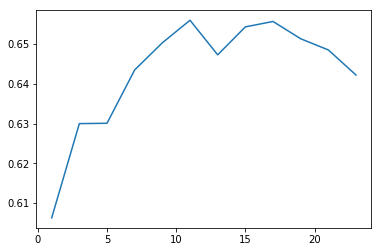

In [72]:
plt.plot(list(range(1, 25, 2)), scores)

In [73]:
knn_1 = KNeighborsClassifier(n_neighbors = 17)

In [74]:
knn_1.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [75]:
knn1_test_pred = knn_1.predict(X_test_scaled)
knn1_train_pred = knn_1.predict(X_train_scaled)

In [76]:
print("Train Metrics:")
print(classification_report(y_train, knn1_train_pred))

Train Metrics:
             precision    recall  f1-score   support

          0       0.88      0.93      0.90     18151
          1       0.74      0.63      0.68      5978

avg / total       0.85      0.85      0.85     24129



In [77]:
print("Test Metrics:")
print(classification_report(y_test, knn1_test_pred))

Test Metrics:
             precision    recall  f1-score   support

          0       0.87      0.91      0.89      4503
          1       0.71      0.61      0.66      1530

avg / total       0.83      0.84      0.83      6033



In [99]:
f1_knn = f1_score(y_test, knn1_test_pred)
f1_knn

0.6556802244039271

In [79]:
acc_knn = accuracy_score(y_test, knn1_test_pred)
acc_knn

0.837228576164429

### Random Forrest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_clf = RandomForestClassifier(n_estimators=50)

In [82]:
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
test_predictions_rf = rf_clf.predict(X_test_scaled)
train_predictions_rf = rf_clf.predict(X_train_scaled)

In [84]:
print("TRAIN:")
print(classification_report(y_train, train_predictions))

TRAIN:
             precision    recall  f1-score   support

          0       0.88      0.93      0.90     18151
          1       0.73      0.61      0.66      5978

avg / total       0.84      0.85      0.84     24129



In [85]:
print("TEST:")
print(classification_report(y_test, test_predictions))

TEST:
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      4503
          1       0.75      0.61      0.68      1530

avg / total       0.84      0.85      0.85      6033



In [98]:
f1_rf = f1_score(y_test, test_predictions_rf)
f1_rf

0.6714776632302405

In [87]:
acc_rf = accuracy_score(y_test, test_predictions_rf)
acc_rf

0.8415382065307475

## GridSearch

Out of those 3 models choose one to perform GridSearch on it's hyper-parameters

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
n_estimators = [50, 100, 200]
max_depth = [None, 5, 10, 15 ]
criterion = ['gini', 'entropy']
min_samples_split = [5, 10, 15]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [90]:
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='f1',cv=3, verbose=1)

In [91]:
gs_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed: 27.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [92]:
test_predictions_rf_gs = gs_rf.predict(X_test_scaled)
train_predictions_rf_gs = gs_rf.predict(X_train_scaled)
print("TRAIN:")
print(classification_report(y_train, train_predictions_rf_gs))
print("TEST:")
print(classification_report(y_test, test_predictions_rf_gs))

TRAIN:
             precision    recall  f1-score   support

          0       0.91      0.96      0.93     18151
          1       0.85      0.72      0.78      5978

avg / total       0.90      0.90      0.90     24129

TEST:
             precision    recall  f1-score   support

          0       0.89      0.93      0.91      4503
          1       0.77      0.65      0.71      1530

avg / total       0.86      0.86      0.86      6033



In [93]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [97]:
f1_rfgs = f1_score(y_test, test_predictions_rf_gs)
f1_rfgs

0.7060906515580736

In [95]:
acc_rfgs = accuracy_score(y_test, test_predictions_rf_gs)
acc_rfgs

0.8624233383059837

### Compare

In [101]:
pd.DataFrame(data=[[f1_log, acc_log],[ f1_knn, acc_knn],[f1_rf,acc_rf],[f1_rfgs,acc_rfgs]],
             index=['Logistic Regression', 'KNN', 'Random Forrest', 'Random Forrest GS'], 
             columns=['f1-score','accuracy'])

,f1-score,accuracy
Logistic Regression,0.675530,0.850323
KNN,0.655680,0.837229
Random Forrest,0.671478,0.841538
Random Forrest GS,0.706091,0.862423
